## Diabetes_Health_Prediction_Using_ANNs

### Step 1: Import necessary libraries
### The first step is to import the libraries that will be used throughout the analysis, such as numpy, pandas, matplotlib, and seaborn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1.2: Load the dataset
### The dataset is loaded into a pandas DataFrame from a CSV file.

In [2]:
df = pd.read_csv(r'/Users/nithyasanthoshini/Desktop/Innomatics/Deep Learning/diabetes_binary_health_indicators_BRFSS2015.csv')

### Step 1.3: Display the first few rows of the dataset
### This helps in understanding the structure and content of the dataset.

In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Step 1.4: Exploratory Data Analysis
EDA is performed to understand the patterns and characteristics of the data.

In [4]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
#Basic information about the DataFrame
print("Number of features (columns):", df.shape)
print("Number of observations (rows):", df.shape[0])

Number of features (columns): (253680, 22)
Number of observations (rows): 253680


In [7]:
print("\nData types of each feature:")
print(df.dtypes)


Data types of each feature:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [8]:
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [9]:
for col in df.columns:
    print(f"{col} : {df[col].value_counts()}\n")

Diabetes_binary : Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

HighBP : HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

HighChol : HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

CholCheck : CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64

BMI : BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

Smoker : Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

Stroke : Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

PhysActivity : PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

Fruits : Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

Veggies : Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

HvyAlcoholConsump

In [10]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes

HighBP: 0 = no high BP 1 = high BP

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol 

BMI: Body Mass Index

Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

Stroke: (Ever told) you had a stroke. 0 = no 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Sex: 0 = female 1 = male

Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

Income : Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


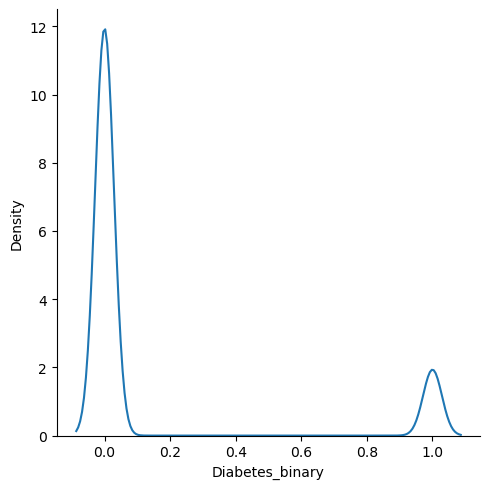

In [12]:
sns.displot(df, x="Diabetes_binary", kind="kde")

/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


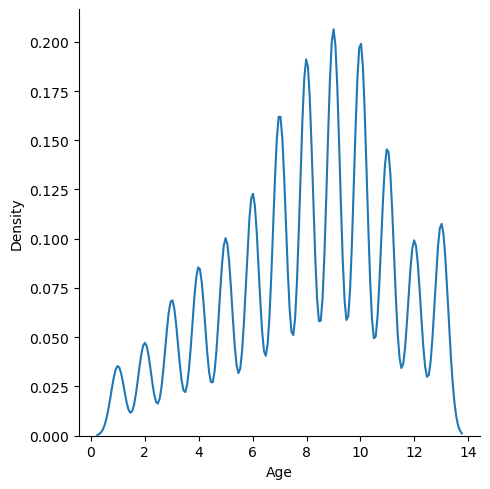

In [13]:
sns.displot(df, x="Age", kind="kde")

0 = no diabetes 1 = prediabetes 2 = diabetes
0 = no high BP 1 = high BP
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementar

Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

<Axes: title={'center': 'HighBP'}, xlabel='HighBP', ylabel='count'>

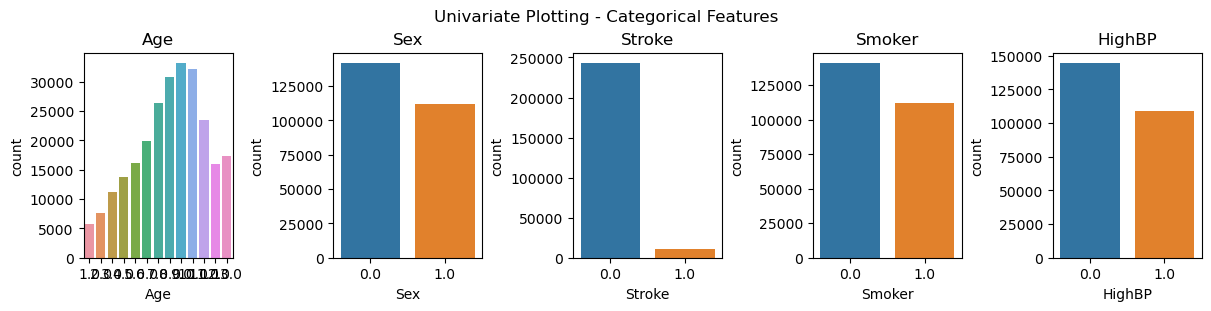

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Age")
sns.countplot(data=df,x='Age',ax=axs[0])

axs[1].set_title("Sex")
sns.countplot(data=df,x='Sex',ax=axs[1])

axs[2].set_title("Stroke")
sns.countplot(data=df,x='Stroke',ax=axs[2])

axs[3].set_title("Smoker")
sns.countplot(data=df,x='Smoker',ax=axs[3])

axs[4].set_title("HighBP")
sns.countplot(data=df,x='HighBP',ax=axs[4])


<Axes: title={'center': 'PhysActivity'}, xlabel='PhysActivity', ylabel='count'>

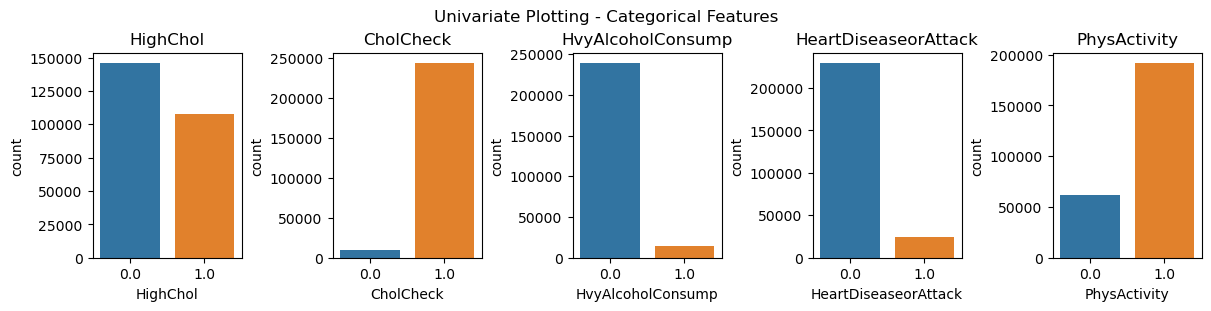

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("HighChol")
sns.countplot(data=df,x='HighChol',ax=axs[0])

axs[1].set_title("CholCheck")
sns.countplot(data=df,x='CholCheck',ax=axs[1])

axs[2].set_title("HvyAlcoholConsump")
sns.countplot(data=df,x='HvyAlcoholConsump',ax=axs[2])

axs[3].set_title("HeartDiseaseorAttack")
sns.countplot(data=df,x='HeartDiseaseorAttack',ax=axs[3])

axs[4].set_title("PhysActivity")
sns.countplot(data=df,x='PhysActivity',ax=axs[4])


<Axes: title={'center': 'Income'}, xlabel='Income', ylabel='count'>

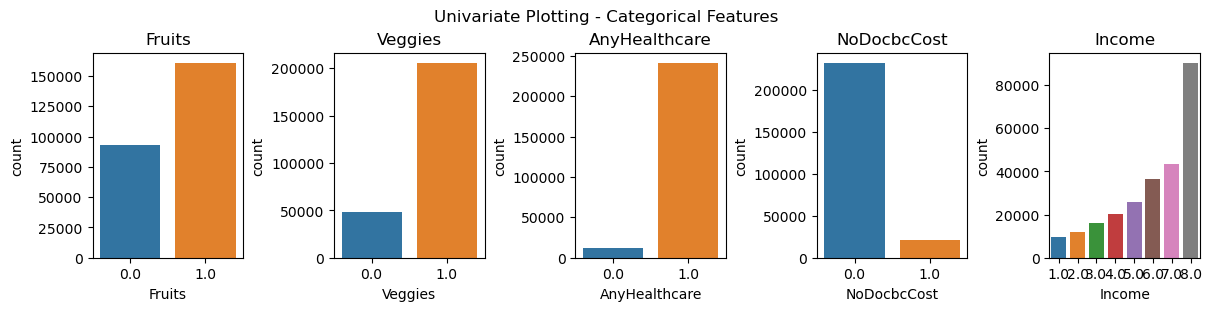

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Fruits")
sns.countplot(data=df,x='Fruits',ax=axs[0])

axs[1].set_title("Veggies")
sns.countplot(data=df,x='Veggies',ax=axs[1])

axs[2].set_title("AnyHealthcare")
sns.countplot(data=df,x='AnyHealthcare',ax=axs[2])

axs[3].set_title("NoDocbcCost")
sns.countplot(data=df,x='NoDocbcCost',ax=axs[3])

axs[4].set_title("Income")
sns.countplot(data=df,x='Income',ax=axs[4])

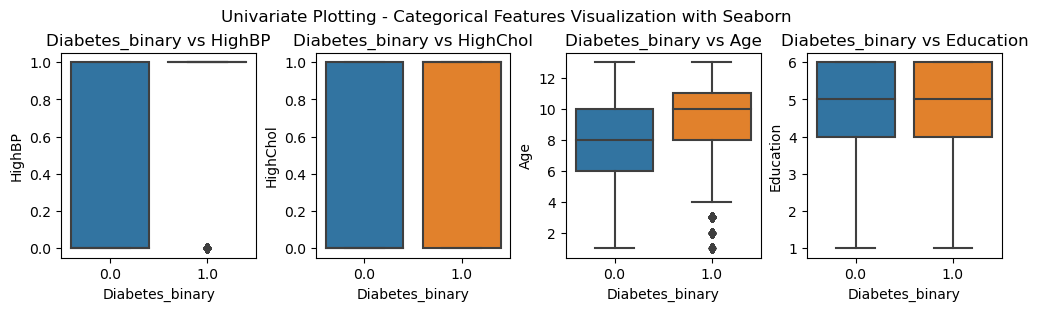

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features Visualization with Seaborn")

axs[0].set_title("Diabetes_binary vs HighBP")
sns.boxplot(data=df,x='Diabetes_binary',y='HighBP',ax=axs[0])

axs[1].set_title("Diabetes_binary vs HighChol")
sns.boxplot(data=df,x='Diabetes_binary',y='HighChol',ax=axs[1])

axs[2].set_title("Diabetes_binary vs Age")
sns.boxplot(data=df,x='Diabetes_binary',y='Age',ax=axs[2])

axs[3].set_title("Diabetes_binary vs Education")
sns.boxplot(data=df,x='Diabetes_binary',y='Education',ax=axs[3])

plt.show()

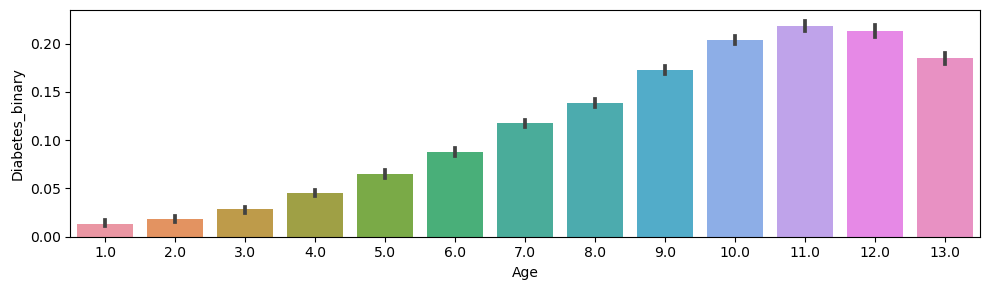

In [18]:
plt.figure(figsize=(10,3))
sns.barplot(x='Age',y='Diabetes_binary',data=df)
plt.tight_layout()

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

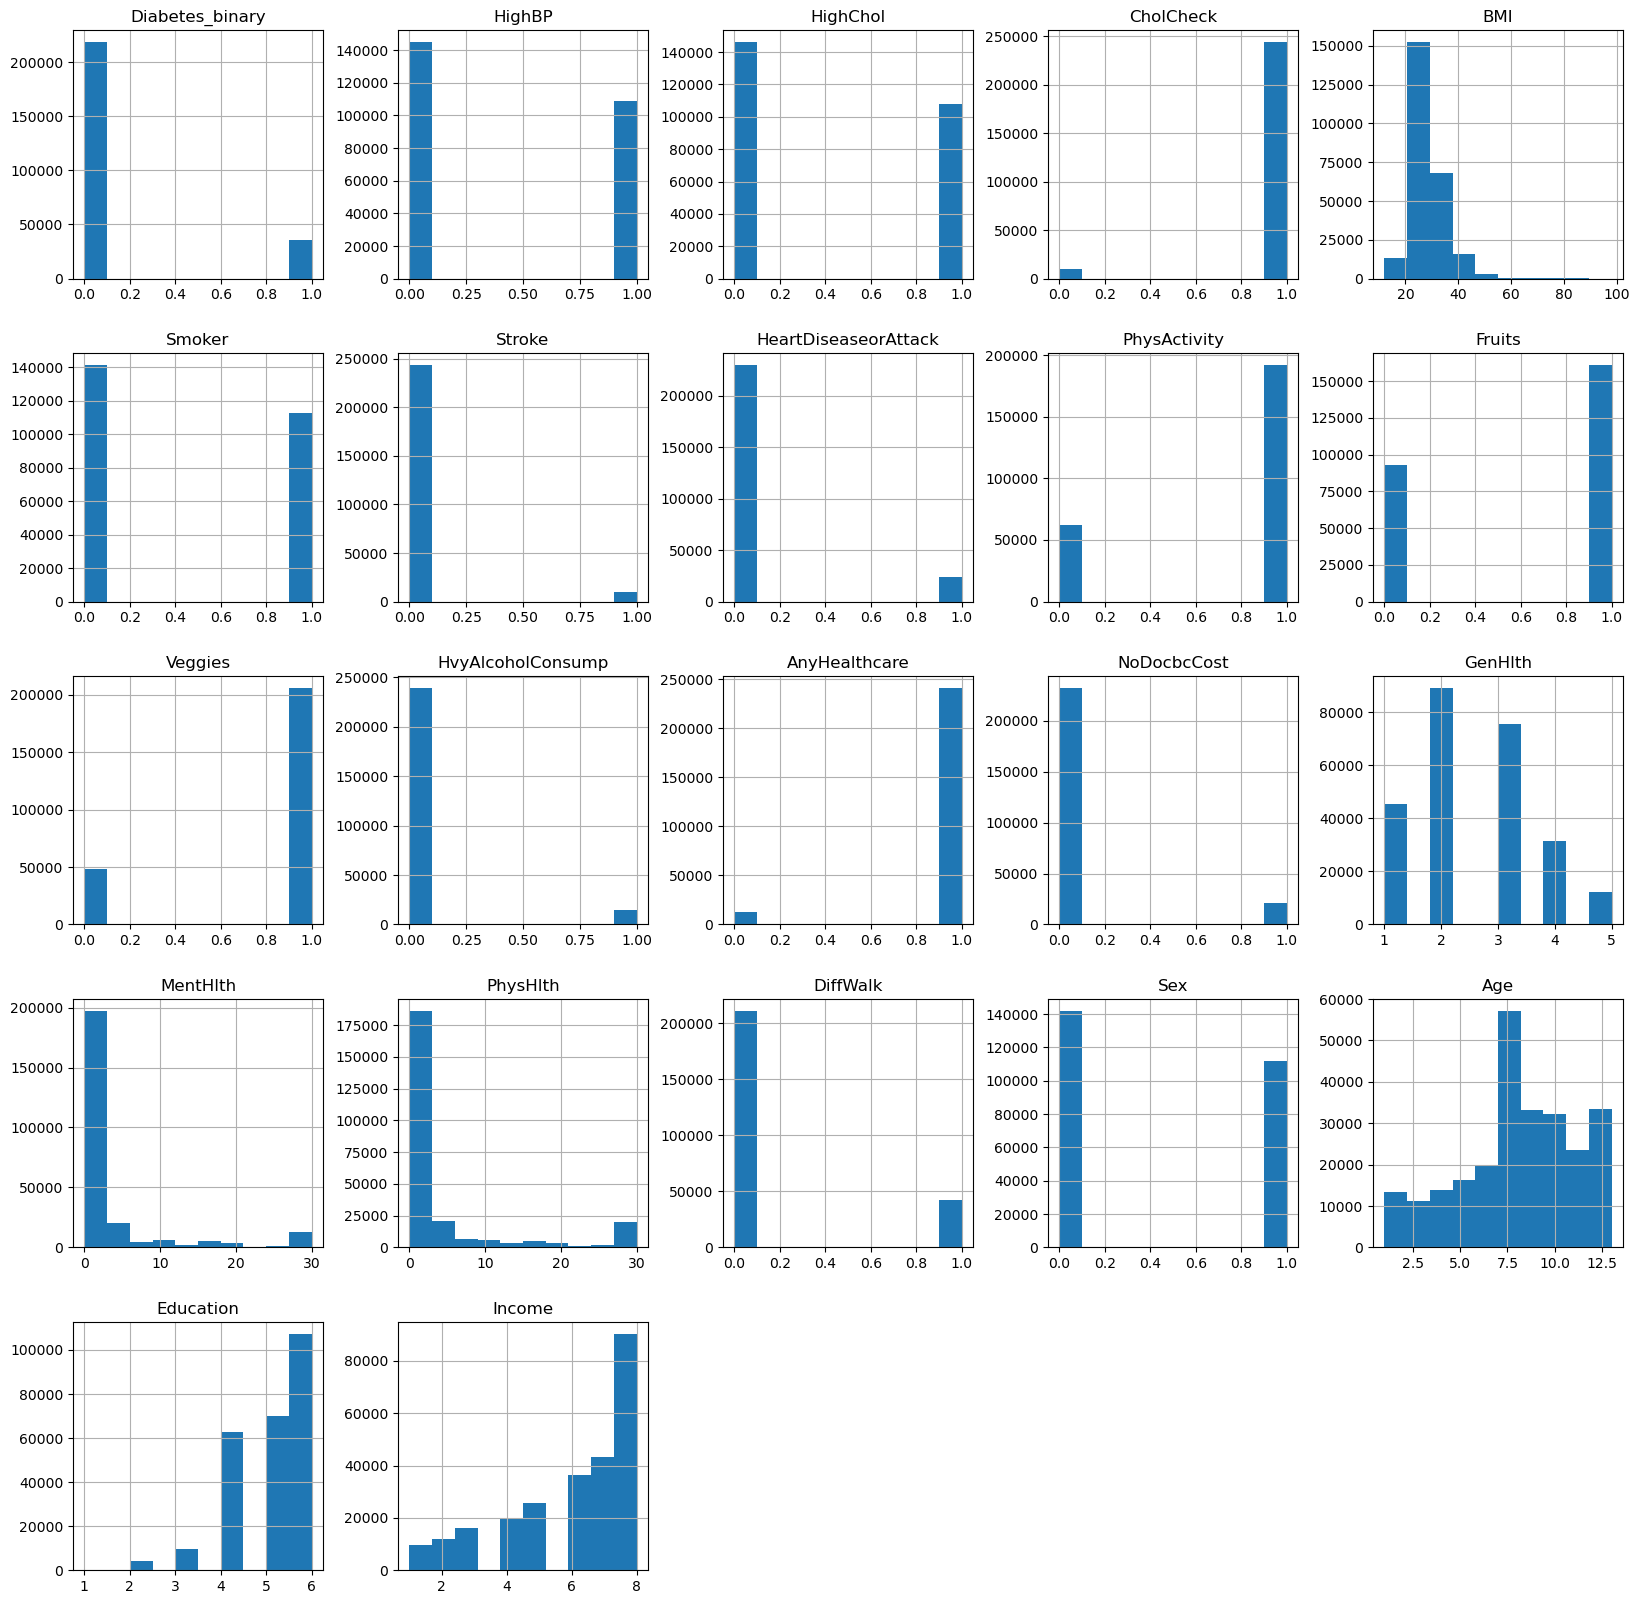

In [19]:
df.hist(figsize = (20,20))

<Axes: xlabel='Diabetes_binary', ylabel='count'>

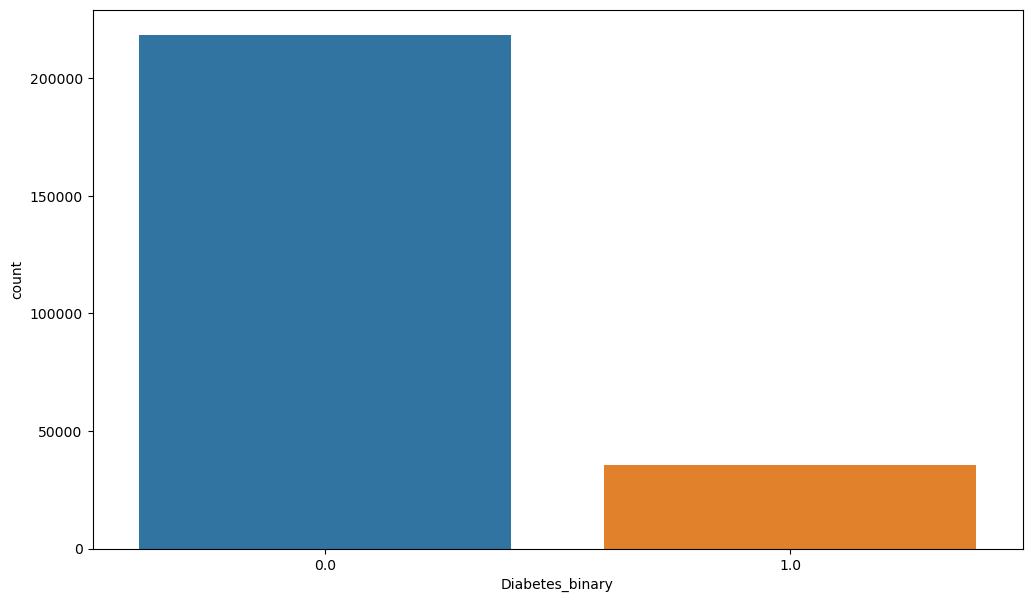

In [20]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Diabetes_binary', data = df)

In [21]:
print("\nData types of each feature:")
print(df.dtypes)


Data types of each feature:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


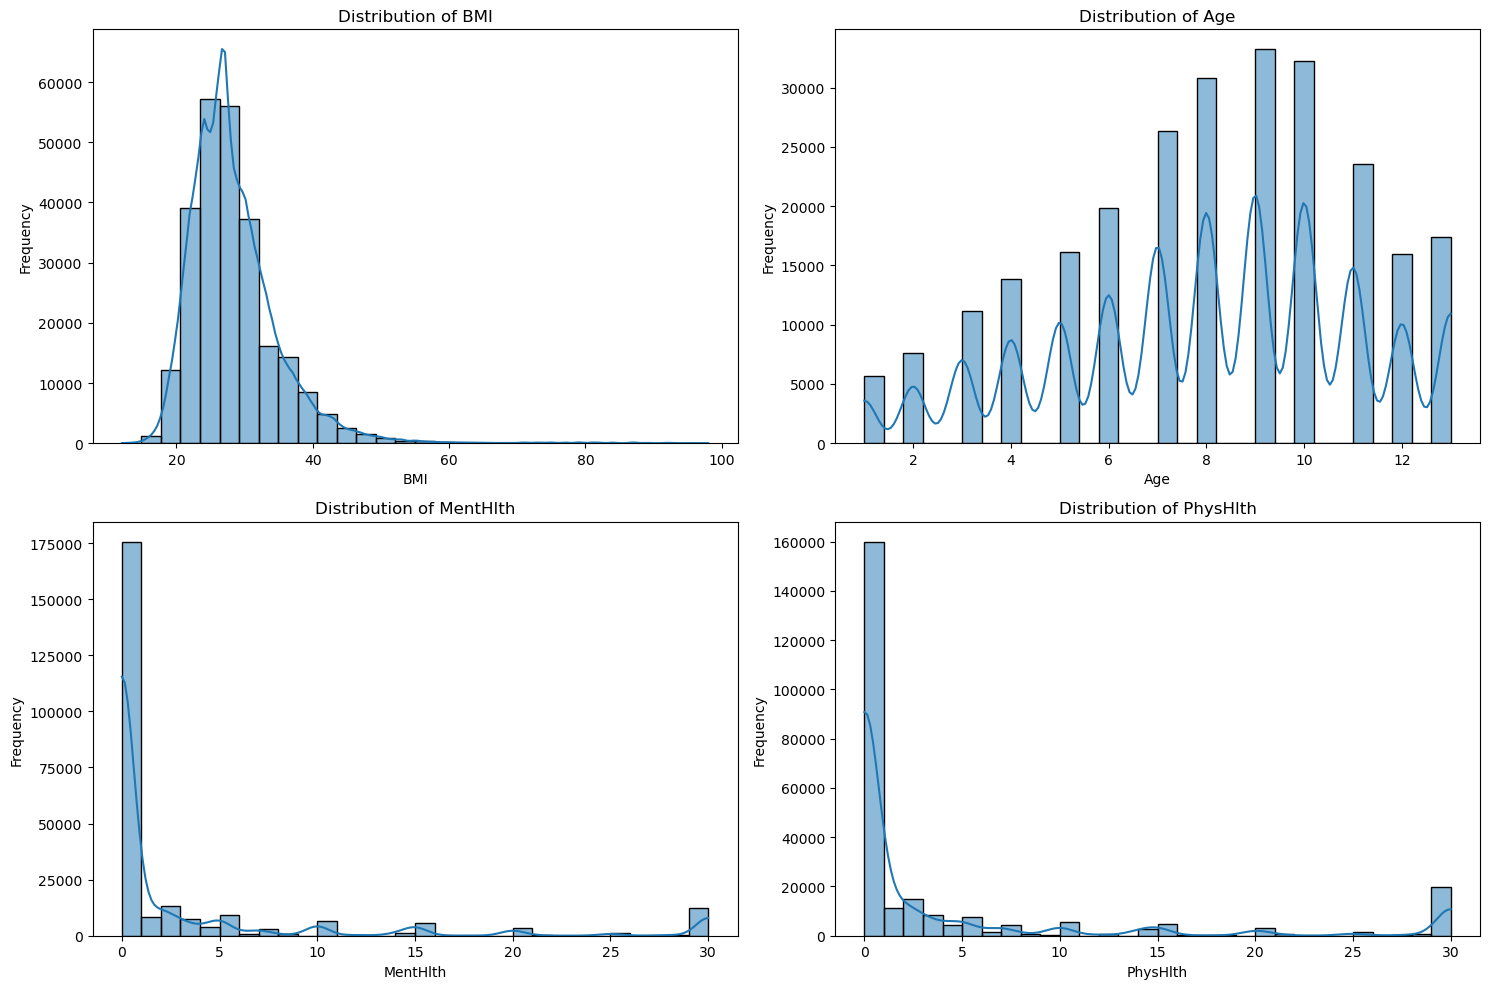

In [22]:
numeric_features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


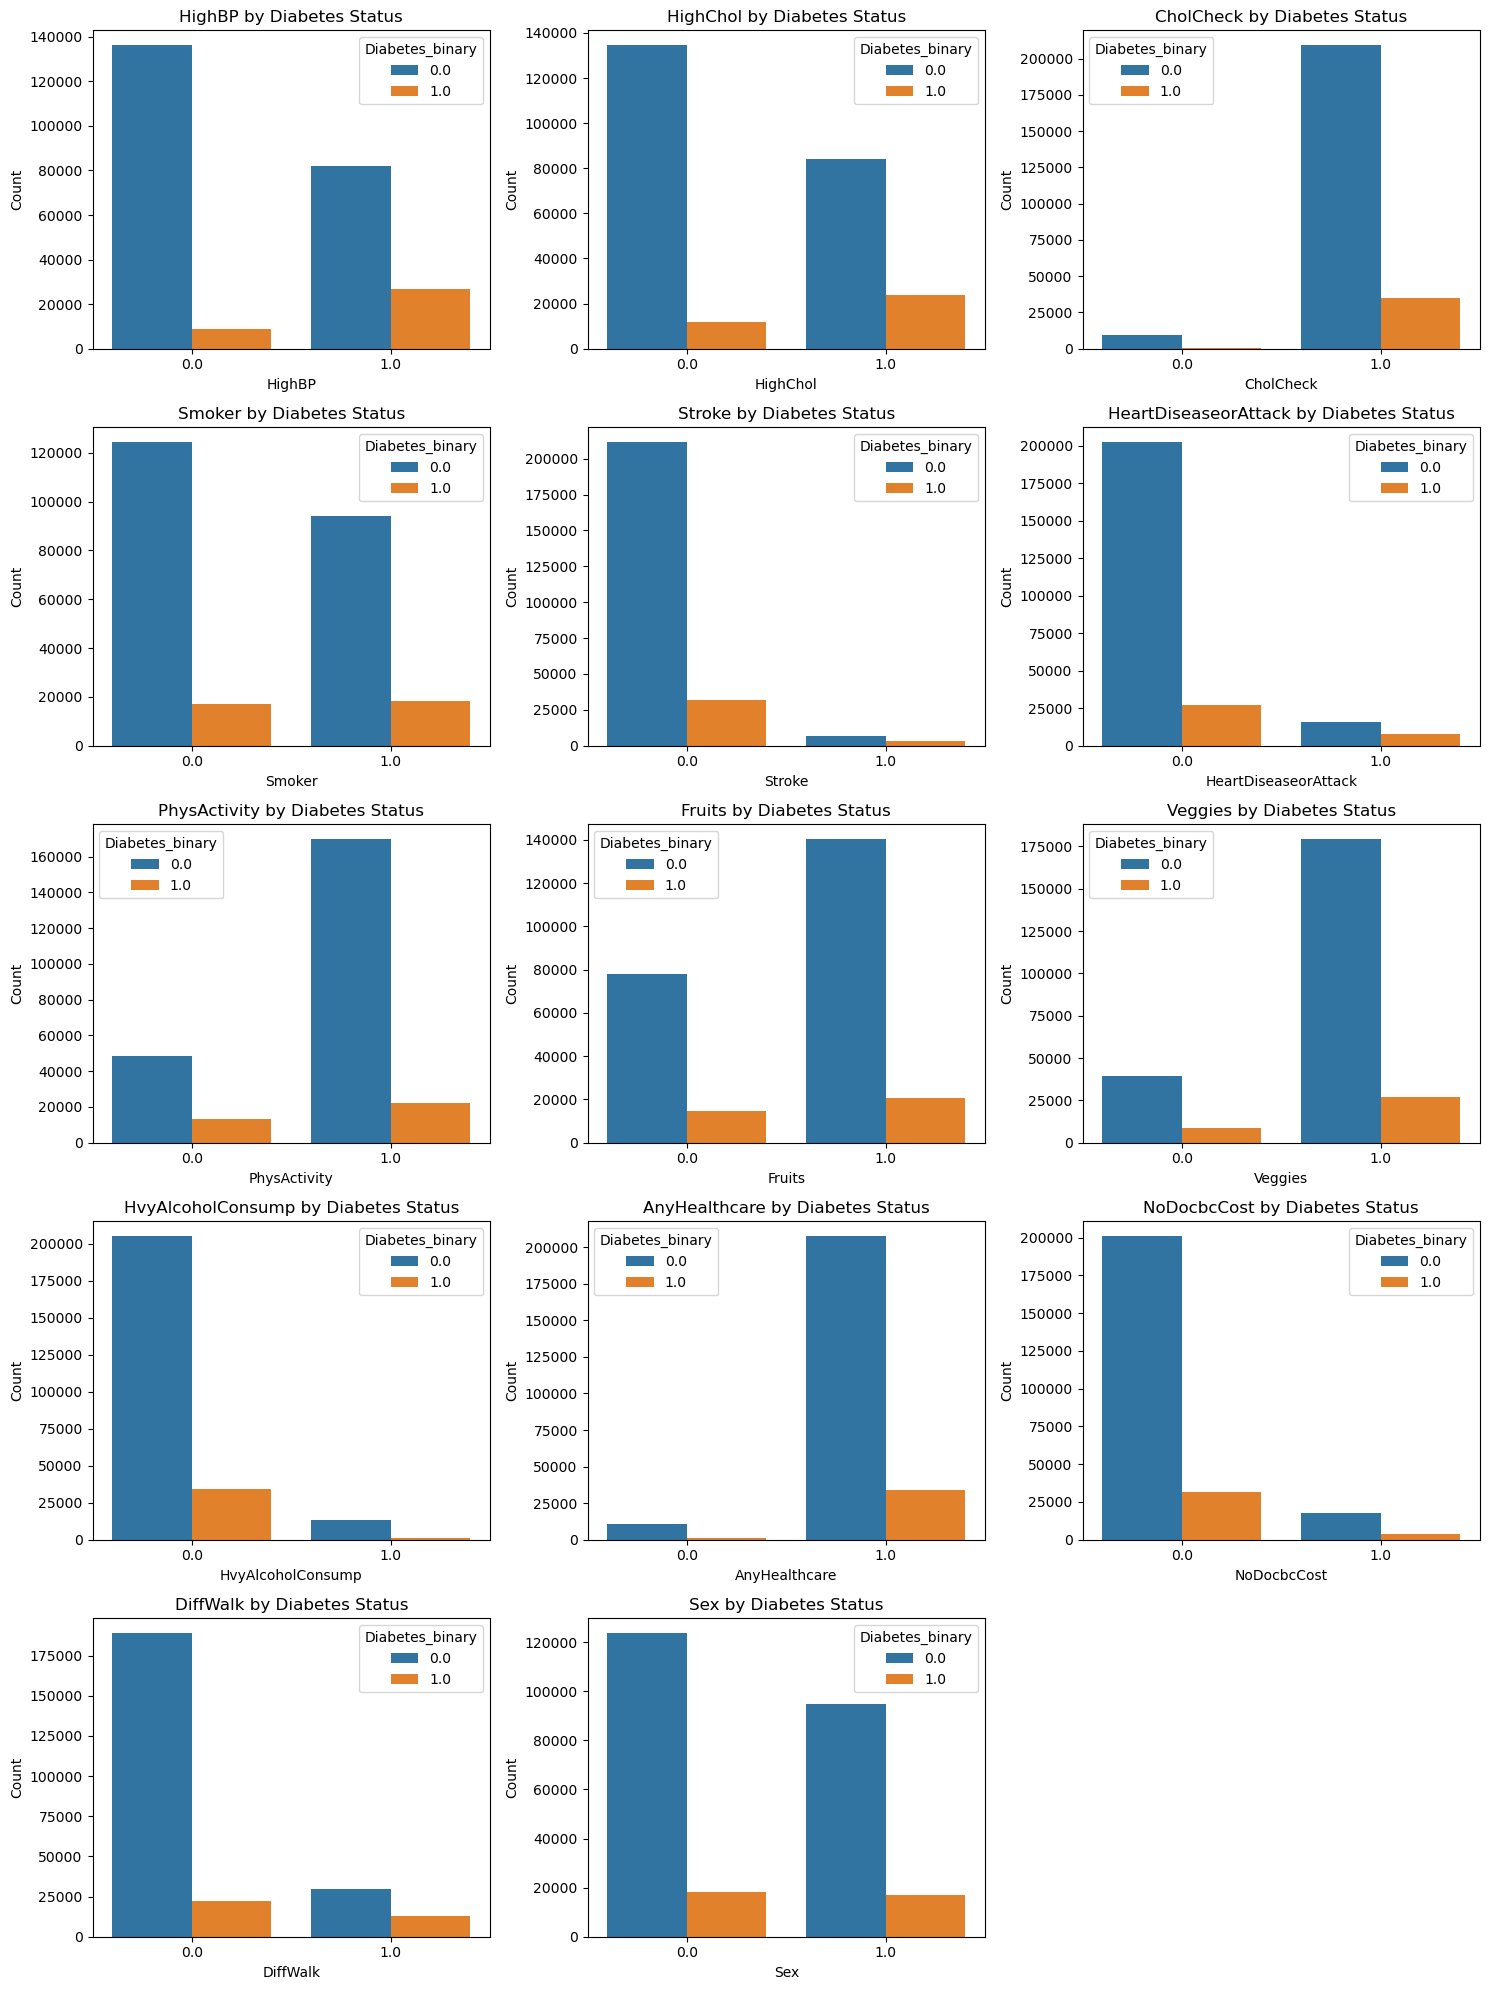

In [23]:
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=feature, hue='Diabetes_binary', data=df)
    plt.title(f'{feature} by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [24]:
# Selecting a subset of features for clarity
subset_features = ['BMI', 'Age', 'MentHlth', 'PhysHlth', 'Diabetes_binary']

sns.pairplot(df[subset_features], hue='Diabetes_binary')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x160698900> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Compute correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check correlation with target variable
print(df[['Income', 'Education', 'Diabetes_binary']].corr())


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Step 2 - Machine Learning
1.Identify the input and output/target variables.
Input variables: age, sex, bmi, children, smoker, region

Output/target variable: charges

2.Identify the type of ML Task.
This is a regression task since we are predicting a continuous variable (medical costs).

3.Identify the Evaluation Metric.
For this regression task, we will use Mean Absolute Error (MAE) as the evaluation metric.


### Step 3: Split the dataset into Training and Testing

In [25]:
from sklearn.model_selection import train_test_split

# Define input and output variables
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [26]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
X

array([[ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465, -1.4744874 ],
       [-0.86678537, -0.85818163, -5.07816412, ..., -0.33793279,
         0.96327159, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465,  0.93963796],
       ...,
       [-0.86678537, -0.85818163,  0.19692156, ..., -1.97501498,
        -0.05116153, -1.95731247],
       [ 1.15368814, -0.85818163,  0.19692156, ..., -0.33793279,
        -0.05116153, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
         0.96327159, -1.95731247]])

In [28]:
# Split the dataset into training and testing sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
X_train

array([[-0.86678537, -0.85818163,  0.19692156, ..., -0.01051636,
        -2.08002777, -2.44013754],
       [ 1.15368814, -0.85818163,  0.19692156, ..., -1.3201821 ,
        -0.05116153, -0.99166232],
       [-0.86678537, -0.85818163, -5.07816412, ..., -0.99276567,
        -1.06559465,  0.45681289],
       ...,
       [ 1.15368814, -0.85818163,  0.19692156, ...,  1.62656583,
        -1.06559465, -0.99166232],
       [ 1.15368814,  1.16525449,  0.19692156, ..., -0.66534923,
         0.96327159,  0.93963796],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  1.62656583,
        -0.05116153, -0.02601218]])

In [30]:
X_train = pd.DataFrame(X_train)

In [31]:
X_train.shape

(190260, 21)

In [32]:
X_test = pd.DataFrame(X_test)

In [33]:
X_test.shape

(63420, 21)

<Axes: >

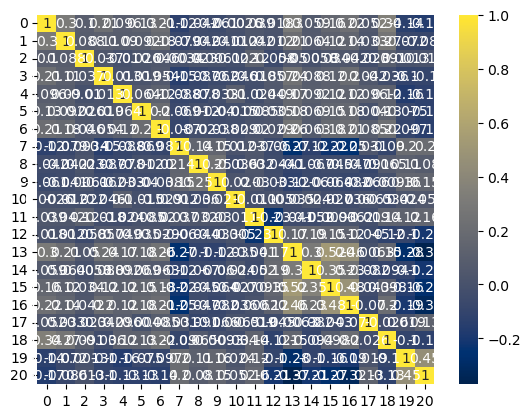

In [34]:
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap='cividis')

<Axes: >

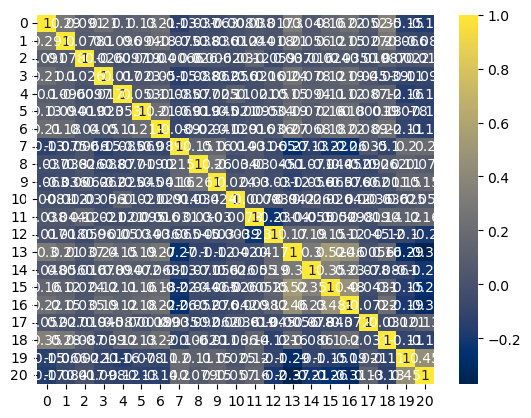

In [35]:
corr = X_test.corr()
sns.heatmap(corr,annot=True,cmap='cividis')

# ANN

In [36]:
## BUILD A NEURAL NETWORK MODEL USING KERAS

import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [37]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[21, ]))

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dropout(0.2))
          
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))          

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        61,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,945 (284.94 KB)

 Trainable params: 72,945 (284.94 KB)

 Non-trainable params: 0 (0.00 B)

### COMPILE AND TRAIN THE ANN MODEL¶

In [38]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
hist = model.fit(X_train, y_train, batch_size=64, epochs= 20)

Epoch 1/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 3s 842us/step - accuracy: 0.8581 - loss: 0.3598
Epoch 2/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 3s 848us/step - accuracy: 0.8654 - loss: 0.3176
Epoch 3/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8663 - loss: 0.3161
Epoch 4/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.8662 - loss: 0.3154
Epoch 5/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.8665 - loss: 0.3148
Epoch 6/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.8669 - loss: 0.3140
Epoch 7/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.8672 - loss: 0.3135
Epoch 8/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.8672 - loss: 0.3126
Epoch 9/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.8674 - loss: 0.3130
Epoch 10/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.8672 - loss: 0.3127
Epoch 11/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.8676 - loss: 0.3127
Epoch 12

In [40]:
y_pred = model.predict(X_test)

1982/1982 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step


In [41]:
y_pred = (y_pred > 0.5)
y_pred 

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [42]:
hist.history.keys()

dict_keys(['accuracy', 'loss'])

### EVALUATE TRAINED MODEL PERFORMANCE

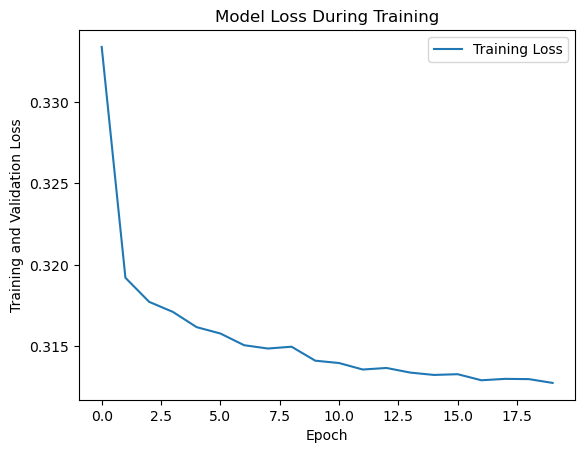

In [43]:
plt.plot(hist.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

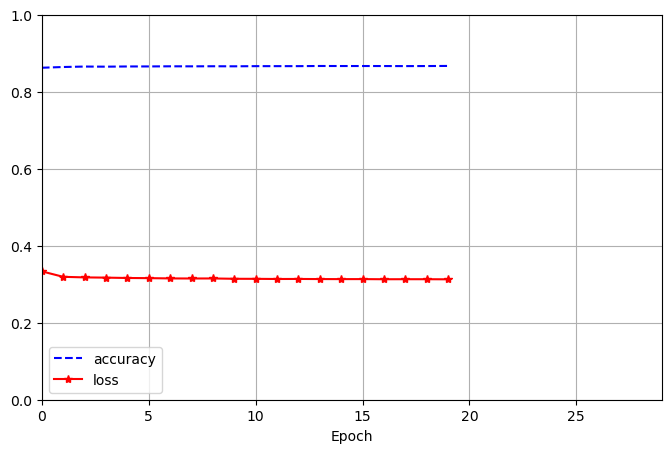

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(hist.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["b--", "r-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

Text(0.5, 23.52222222222222, 'Predicted label')

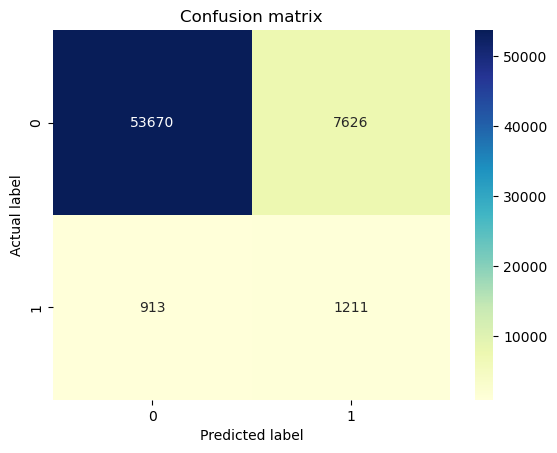

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     54583
         1.0       0.57      0.14      0.22      8837

    accuracy                           0.87     63420
   macro avg       0.72      0.56      0.57     63420
weighted avg       0.83      0.87      0.83     63420



In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a KNN classifier
KNN = KNeighborsClassifier(n_neighbors = 11)

# Fit the classifier on the training data
KNN.fit(X_train, y_train)

# Predict on the test data
y_test_pred = KNN.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
KNN_accuracy = accuracy
print("KNN accuracy:", accuracy)

KNN accuracy: 0.8566540523494166


In [49]:
X_test = np.ascontiguousarray(X_test)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Fit the classifier on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
LogisticRegression_accuracy = accuracy
print("Logistic Regression accuracy:", accuracy)

Logistic Regression accuracy: 0.862882371491643


### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
# Predict on the test data
y_test_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
SVM_accuracy = accuracy
print("Support Vector Machine accuracy:", accuracy)

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
# Predict on the test data
y_test_pred = RFC.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
RandomForestClassifier_accuracy = accuracy
print("RandomForestClassifier accuracy:", accuracy)

RandomForestClassifier accuracy: 0.8593345947650584


### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
# Predict on the test data
y_test_pred = DTC.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
DecisionTree_accuracy = accuracy
print("DecisionTree accuracy:", accuracy)

DecisionTree accuracy: 0.797682119205298


In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape = (21, )))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
          
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

In [38]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
hist1 = model.fit(X_train, y_train, batch_size=32, epochs= 20)

Epoch 1/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 6s 941us/step - accuracy: 0.8647 - loss: 0.3228
Epoch 2/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 892us/step - accuracy: 0.8668 - loss: 0.3156
Epoch 3/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 787us/step - accuracy: 0.8674 - loss: 0.3143
Epoch 4/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 817us/step - accuracy: 0.8669 - loss: 0.3141
Epoch 5/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 864us/step - accuracy: 0.8667 - loss: 0.3140
Epoch 6/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 6s 935us/step - accuracy: 0.8673 - loss: 0.3132
Epoch 7/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 772us/step - accuracy: 0.8676 - loss: 0.3133
Epoch 8/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 792us/step - accuracy: 0.8675 - loss: 0.3127
Epoch 9/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 6s 925us/step - accuracy: 0.8680 - loss: 0.3126
Epoch 10/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 784us/step - accuracy: 0.8677 - loss: 0.3124
Epoch 11/20
5946/5946 ━━━━━━━━━━━━━━━━━━━━ 5s 814us/step - accuracy: 0.8681 - loss: 0.3122
Epoch 12

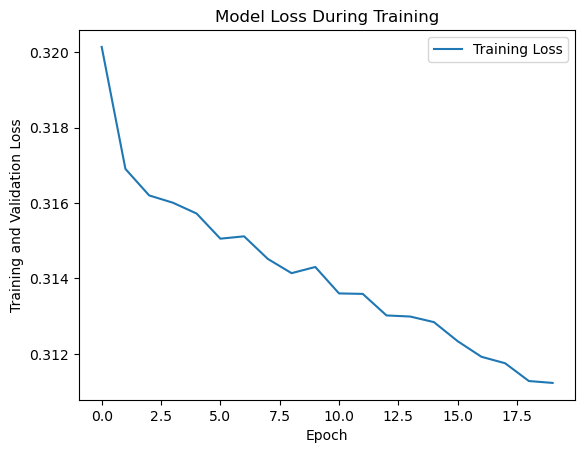

In [67]:
plt.plot(hist1.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

Text(0.5, 23.52222222222222, 'Predicted label')

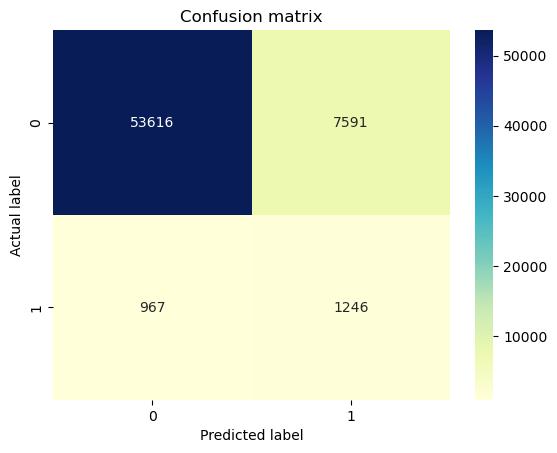

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

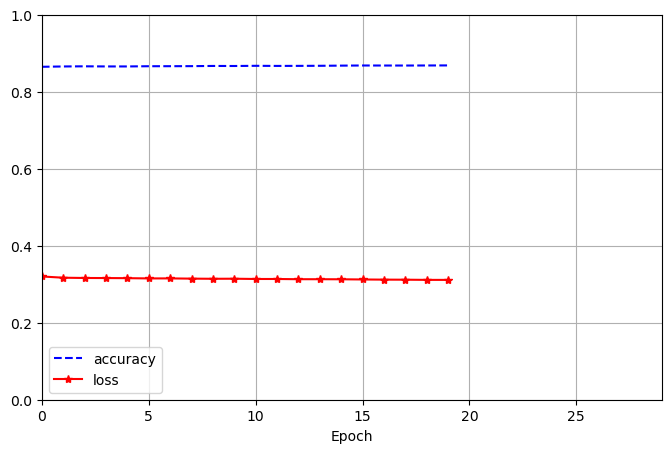

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(hist1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["b--", "r-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [66]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate models with all features
model_full = RandomForestClassifier()
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Train and evaluate models without Income and Education
X_train_reduced = X_train.drop(['Income', 'Education'], axis=1)
X_test_reduced = X_test.drop(['Income', 'Education'], axis=1)

model_reduced = RandomForestClassifier()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print(f'Accuracy with all features: {accuracy_full:.4f}')
print(f'Accuracy without Income and Education: {accuracy_reduced:.4f}')

KeyError: "['Income', 'Education'] not found in axis"